# Figure 6

## Imports

In [1]:
from brian2 import *
prefs.codegen.target = 'numpy'

import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import glob

from encoder_class.phase_encoder import PhaseEncoder, run_simulation
from encoder_class.theoretical_functions import phi_of_I_lin, phi_of_I, mixture, zero_order_H, gauss_H, approx_mutual_I, bins_mutual_I
from encoder_class.plot_functions import plt_fig_6b, plt_fig_6c, plt_fig_6d

## Network Setup

In [2]:
# a network identical to that in Figure_6_simulations.py is initialized

M = 10
N = 1


model_params = {}
model_params["tau_m"] = 24*ms
model_params["R_m"] = 142e6*ohm
model_params["v_thres"] = 15*mV
model_params["v_rest"] = 0*mV
model_params["v_reset"] = 0*mV
model_params["tau_ref"] = 0*ms
model_params["v_0"] = 0*mV
model_params["noise_frac"] = 0.2

oscillation_params = {}
oscillation_params["I_osc"] = 40*pA
oscillation_params["f"] = 4*Hz

input_params = {}
input_params["automatic_range"] = True
input_params["corr_frac"] = 0.05
input_params["I_min"] = 75*pA
input_params["I_max"] = 130*pA

simulation_params = {}
simulation_params["method"] = "euler"
simulation_params["num_oscillations"] = 400
simulation_params["monitor_spikes"] = True
simulation_params["monitor_voltage"] = False
simulation_params["dt"] = 0.05*ms
simulation_params["record_dt"] = 0.5*ms

In [3]:
## parameter space is also initialized identically

partition = 100

Iosc_lims = [30*pA, 80*pA]
f_lims = [1*Hz, 50*Hz]

Ioscs = np.linspace(Iosc_lims[0], Iosc_lims[1], partition)
fs = np.linspace(f_lims[0], f_lims[1], partition)

experiments = itertools.product(Ioscs, fs)
num_experiments = len(list(experiments))

## Load and Process Data

In [4]:
#load data generated with grid_freqIosc_cluster.py

exp_MI_matrix = []
files = [file for file in sorted(glob.glob('cluster_sims/Data_Iosc/*.pickle'))]

for filename in files:
    with open(filename, 'rb') as handle:
        result = pickle.load(handle)
        exp_MI_matrix.append( result['MI'] )
        
exp_MI_matrix = np.reshape(exp_MI_matrix, (100,100))
fs_matrix = np.log2(np.exp(1))*np.transpose(np.repeat(fs, partition).reshape(partition, partition))/Hz
exp_bits_second = fs_matrix*exp_MI_matrix


#get normalized values
exp_normalized = np.zeros((partition,partition))
for index, row in enumerate(exp_bits_second):
    exp_normalized[index, :] = row/np.max(row)  

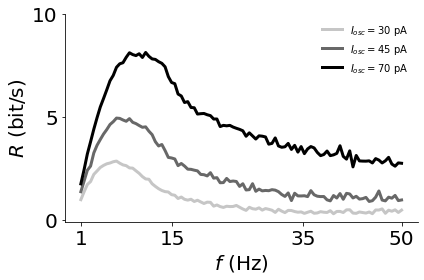

In [5]:
num_Ioscs = 4
Iosc_cm = cm.Greys(np.linspace(0, 1, num_Ioscs))

for i, index in enumerate([0, 30, 80]):
    Iosc_label = r"$I_{osc} = $" + str(Ioscs[index])[:2] + r" pA"
    plt.plot(fs, exp_bits_second[index,:], color=Iosc_cm[i + 1], label=Iosc_label, linewidth=3)

plt_fig_6b()
plt.savefig('Figures/Figure_6b.svg', dpi=600)
plt.savefig('Figures/Figure_6b.png', dpi=600)

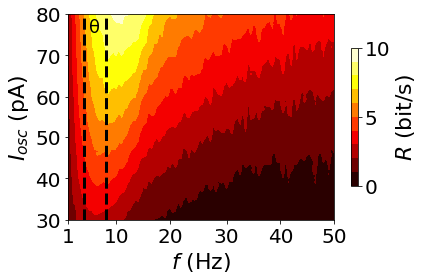

In [6]:
#plt.figure(figsize=(10,8))

#plt.imshow(bits_second_matrix, cmap='hot', interpolation='bilinear', vmin=0, origin='lower')
plt.contourf(exp_bits_second, cmap='hot', vmin=0,levels=10)


plt_fig_6c(fs, Ioscs)
plt.savefig('Figures/Figure_6c.svg', dpi=600)
plt.savefig('Figures/Figure_6c.png', dpi=600)
plt.show()

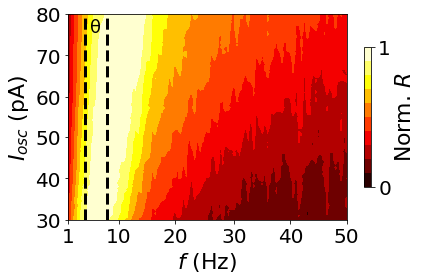

In [7]:
#plt.figure(figsize=(10,8))
plt.contourf(exp_normalized, cmap='hot', levels=10, vmin=0)

plt_fig_6d(fs, Ioscs)
plt.savefig('Figures/Figure_6d.svg', dpi=600)
plt.savefig('Figures/Figure_6d.png', dpi=600)
plt.show()